#Réalisé par Amel Lattari M2 ISD

In [1]:
#bibliothèques à installer

In [2]:
#pip install rasterio

In [3]:
#pip install dash

In [4]:
#pip install dash plotly colorbrewer opencv-python


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve

# Chemins des images
yellow_pickup_path = "nyc_pickup_yellow374_WB.png"
green_pickup_path = "nyc_pickup_green351_WB.png"
yellow_dropoff_path = "nyc_dropoff_yellow1156_WB.png"

# Charger les données brutes dans les tableaux
yellow_pickup = np.array(cv2.imread(yellow_pickup_path, cv2.IMREAD_UNCHANGED))
green_pickup = np.array(cv2.imread(green_pickup_path, cv2.IMREAD_UNCHANGED))
yellow_dropoff = np.array(cv2.imread(yellow_dropoff_path, cv2.IMREAD_UNCHANGED))

# Vérification des dimensions et des valeurs maximales pour chaque tableau
assert yellow_pickup.dtype == np.uint16 and yellow_pickup.max() <= 65535, "Yellow Pickup invalid."
assert green_pickup.dtype == np.uint16 and green_pickup.max() <= 65535, "Green Pickup invalid."
assert yellow_dropoff.dtype == np.uint16 and yellow_dropoff.max() <= 65535, "Yellow Dropoff invalid."

In [6]:
def gaussian_kernel(size, sigma=1):
    """Créer un noyau gaussien."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Appliquer le flou
kernel_size = 5  # Taille du noyau
sigma = 1.0  # Écart type pour le flou
kernel = gaussian_kernel(kernel_size, sigma)


yellow_pickup_blurred = convolve(yellow_pickup, kernel, mode='reflect')
green_pickup_blurred = convolve(green_pickup, kernel, mode='reflect')
yellow_dropoff_blurred = convolve(yellow_dropoff, kernel, mode='reflect')

# Fonction pour visualiser l'image originale et l'image floutée côte à côte
def visualize_images(original_image, blurred_image, title_original, title_blurred):
    plt.figure(figsize=(12, 6))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray', aspect='auto')
    plt.title(title_original)
    plt.axis('off')

    # Image floutée
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image, cmap='gray', aspect='auto')
    plt.title(title_blurred)
    plt.axis('off')

    plt.show()


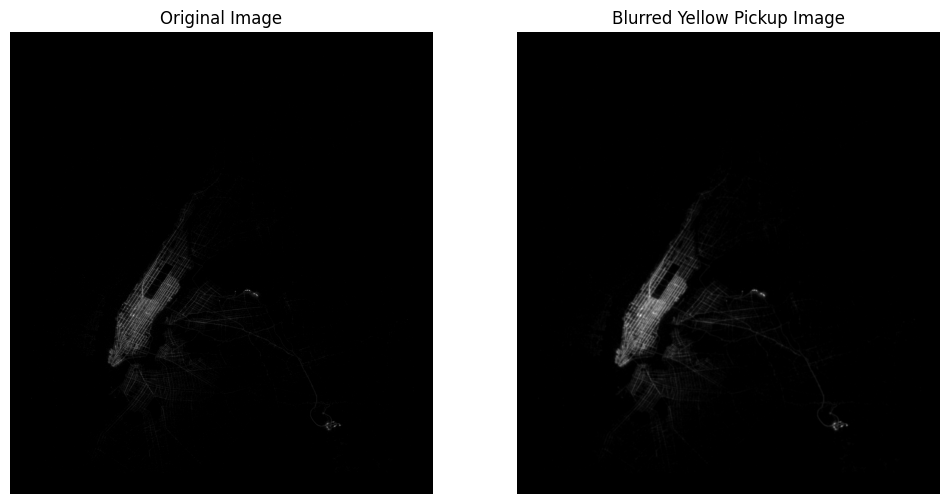

In [7]:
# Visualiser les images
visualize_images(
    yellow_pickup,
    yellow_pickup_blurred,
    title_original="Original Image",
    title_blurred="Blurred Yellow Pickup Image"
)


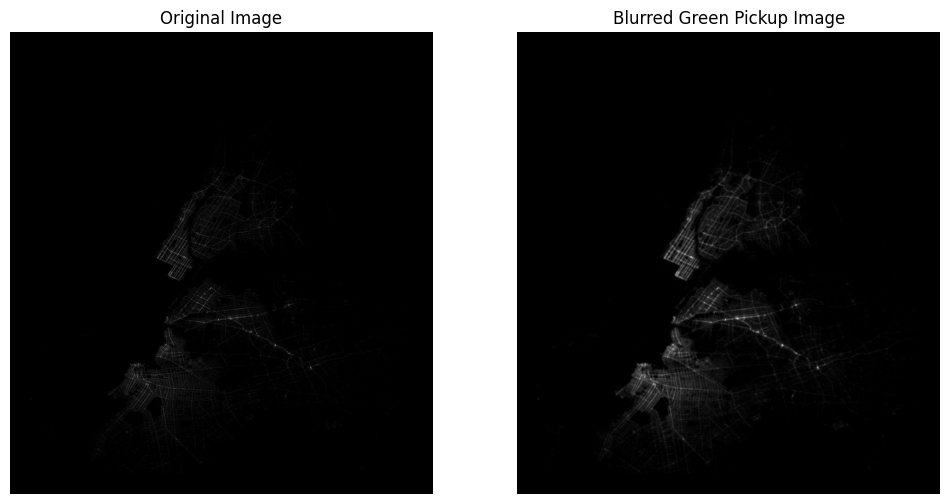

In [8]:
# Visualiser les images
visualize_images(
    green_pickup,
    green_pickup_blurred,
    title_original="Original Image",
    title_blurred="Blurred Green Pickup Image"
)


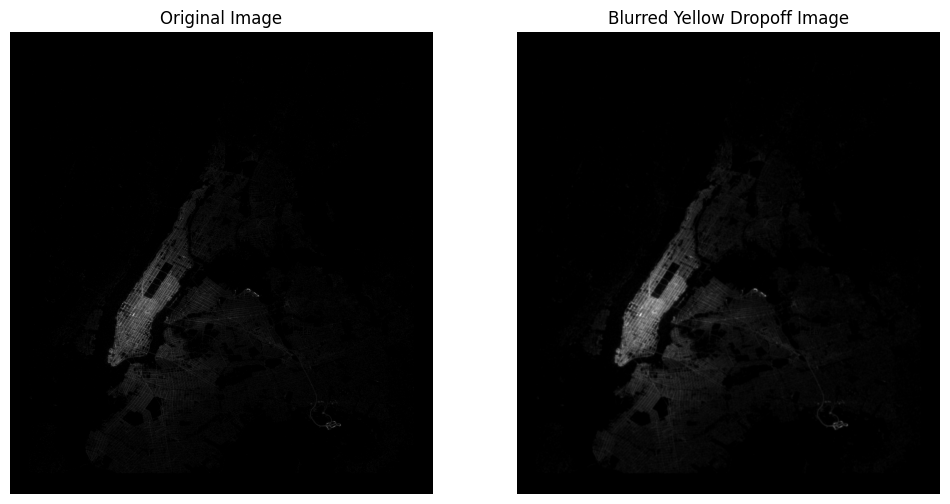

In [9]:
# Visualiser les images
visualize_images(
    yellow_dropoff,
    yellow_dropoff_blurred,
    title_original="Original Image",
    title_blurred="Blurred Yellow Dropoff Image"
)


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image  # Utilisé pour sauvegarder les images

# Fonction pour visualiser une image avec un titre et un dégradé personnalisé
def visualize_images(image, title, cmap):
    plt.figure(figsize=(12, 8))
    plt.imshow(image, cmap=cmap, aspect='auto')
    plt.title(title)
    plt.axis('off')
    plt.colorbar(label="Intensité")
    plt.show()

# Étape 1 : Normalisation
def normalize_image(data, max_value=65535):
    return data / max_value

# Étape 2 : Transformation pour améliorer le contraste
def transform_image(data, exponent=1/4):
    return np.power(data, exponent)

# Étape 3 : Suppression des valeurs aberrantes
def remove_outliers(data, threshold_factor=0.20):
    threshold = np.percentile(data, 100 * threshold_factor)
    return np.where(data > threshold, data, 0)

# Étape 4 : Remultiplication par la valeur maximale
def remultiply_image(data, max_value=65535):
    return (data * max_value).astype(np.uint16)

# Fonction pour sauvegarder l'image finale
def save_image(image, filename):
    # Convertir l'image en uint16 si nécessaire
    if image.dtype != np.uint16:
        image = (image * 65535).astype(np.uint16)
    Image.fromarray(image).save(filename)
    print(f"Image sauvegardée sous : {filename}")

# Appliquer les transformations et visualiser les étapes
def process_and_visualize( blurred_data, output_filename, max_value=65535, exponent=1/4, threshold_factor=0.05, cmap="viridis"):
    # Étape 1 : Normalisation
    normalized = normalize_image(blurred_data, max_value)
    visualize_images(normalized, "Normalisée", cmap)

    # Étape 2 : Transformation
    transformed = transform_image(normalized, exponent)
    visualize_images(transformed, "Transformée", cmap)

    # Étape 3 : Suppression des valeurs aberrantes
    filtered = remove_outliers(transformed, threshold_factor)
    visualize_images(filtered, "Filtrée (valeurs aberrantes supprimées)", cmap)

    # Étape 4 : Remultiplication par la valeur maximale
    final_image = remultiply_image(filtered, max_value)
    visualize_images(final_image, "Remultipliée par max_value", cmap)

    # Enregistrement de l'image finale
    save_image(final_image, output_filename)

    return final_image

# Dégradés personnalisés
yellow_pickup_cmap = "hot"  # Rouge vers jaune
yellow_dropoff_cmap = "magma"  # Magenta
green_pickup_cmap = "viridis"  # Bleu vers vert


Traitement pour Yellow Pickup :


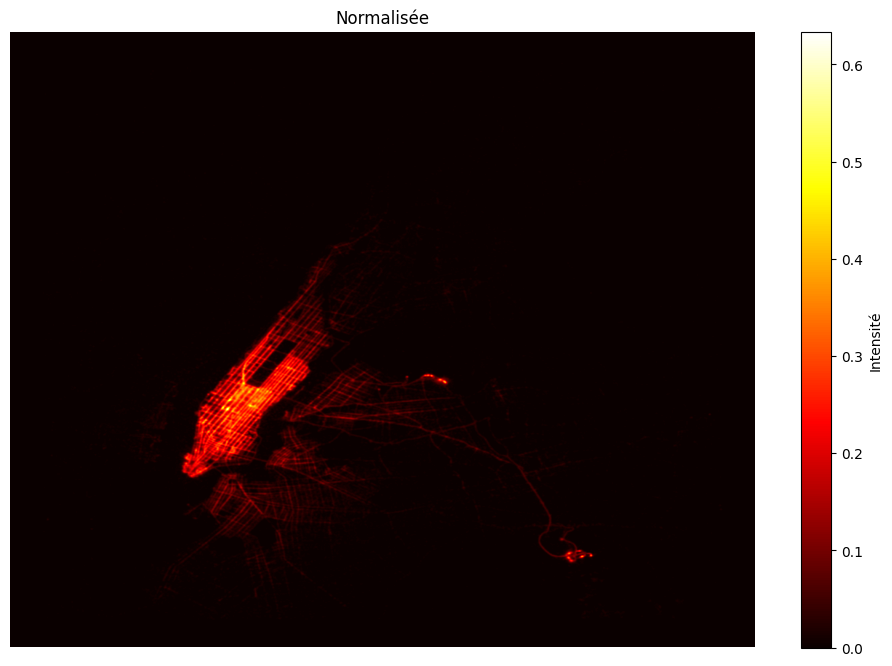

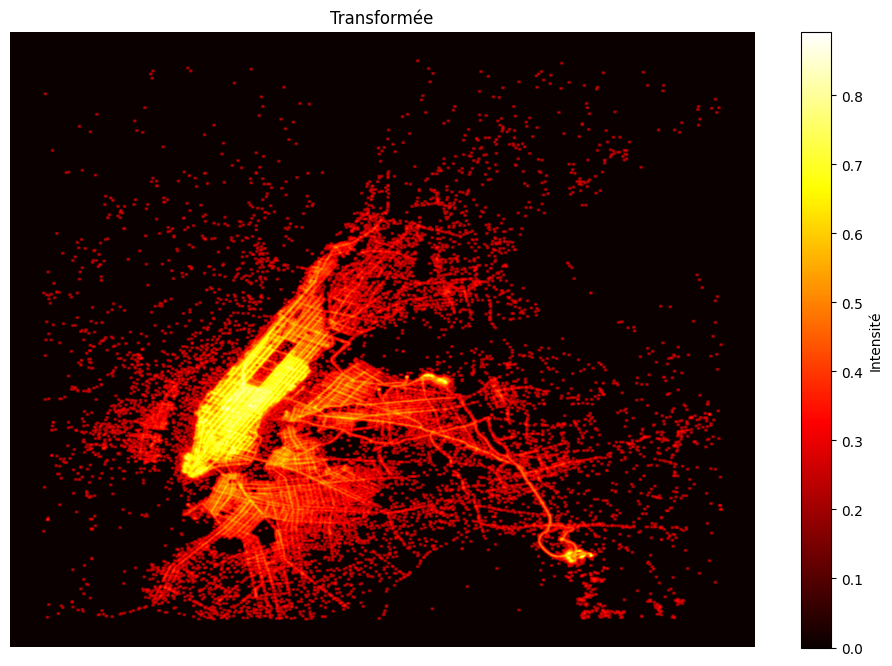

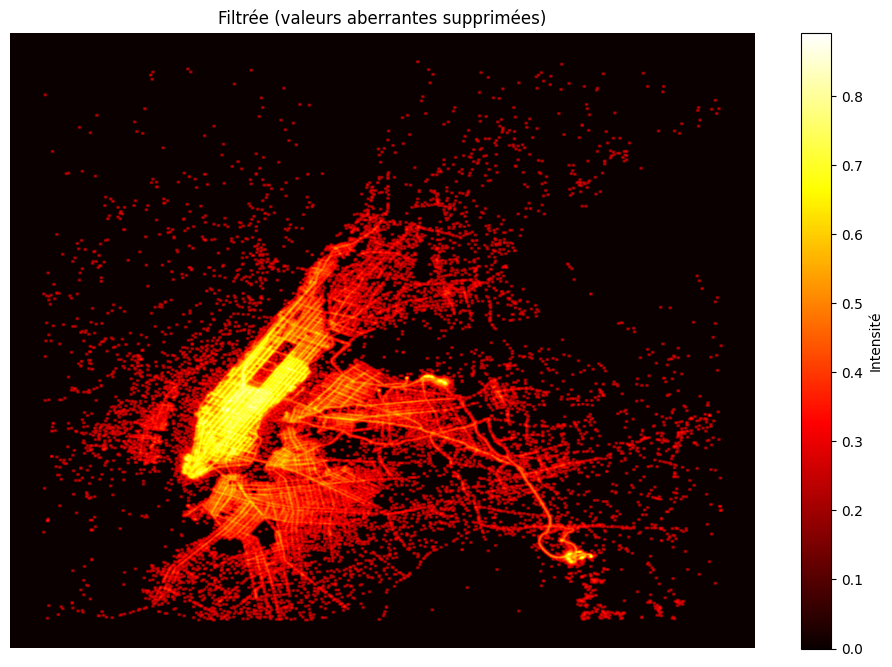

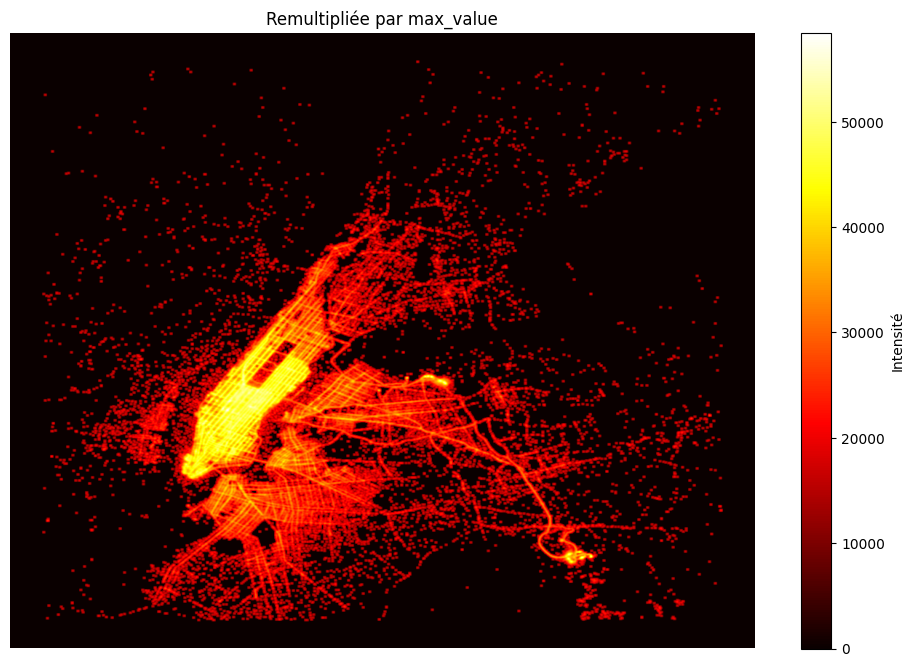

Image sauvegardée sous : yellow_pickup_final.png


In [11]:
# Appliquer le processus pour chaque image avec les dégradés personnalisés et enregistrer les résultats
print("Traitement pour Yellow Pickup :")
processed_yellow_pickup = process_and_visualize(
     yellow_pickup_blurred, "yellow_pickup_final.png", cmap=yellow_pickup_cmap
)


Traitement pour Green Pickup :


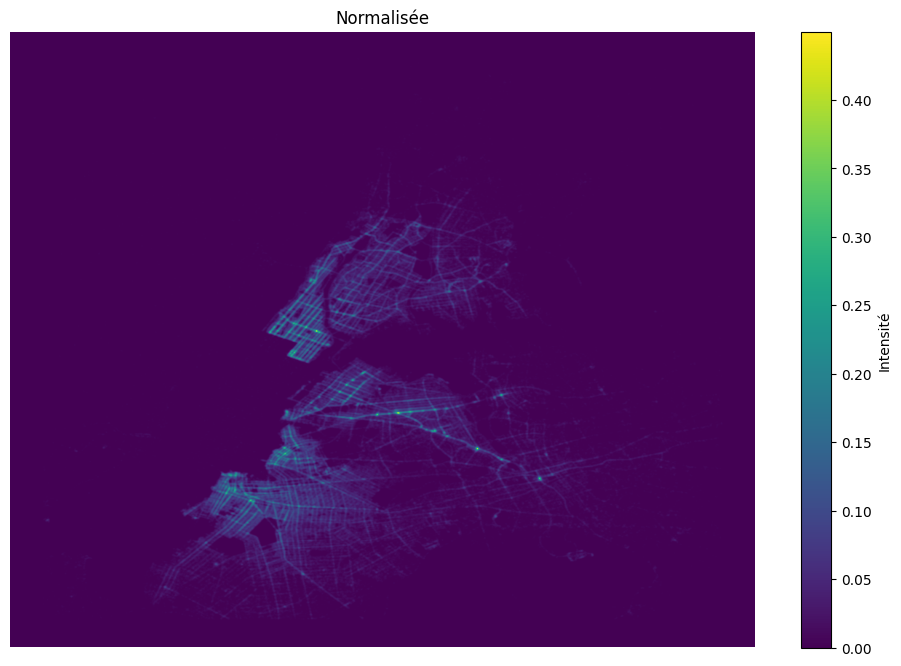

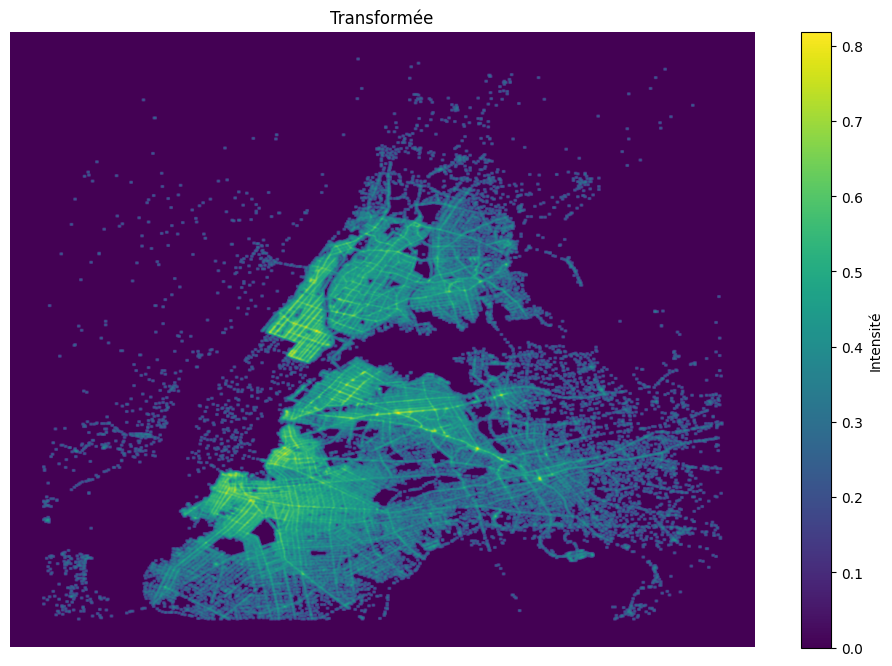

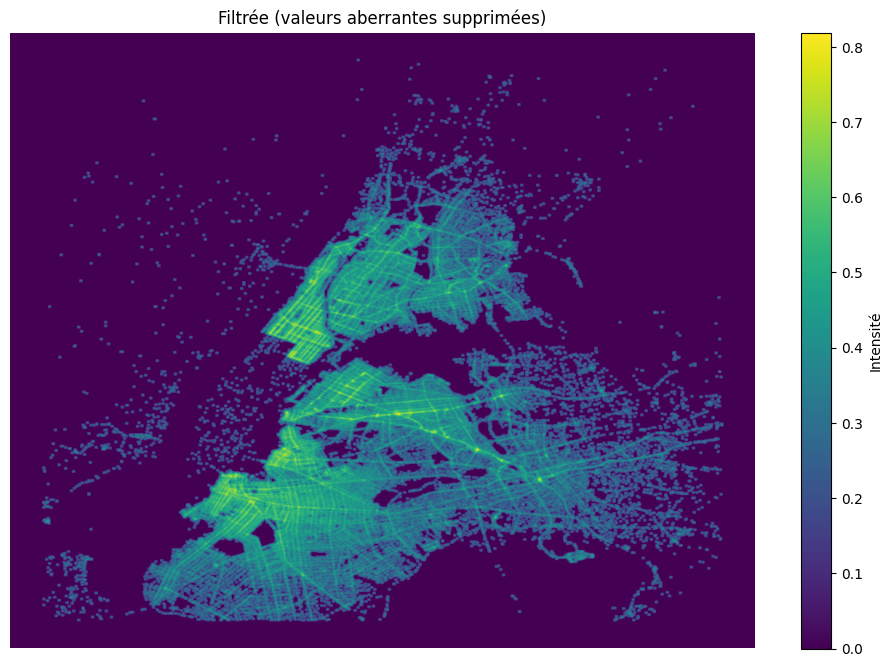

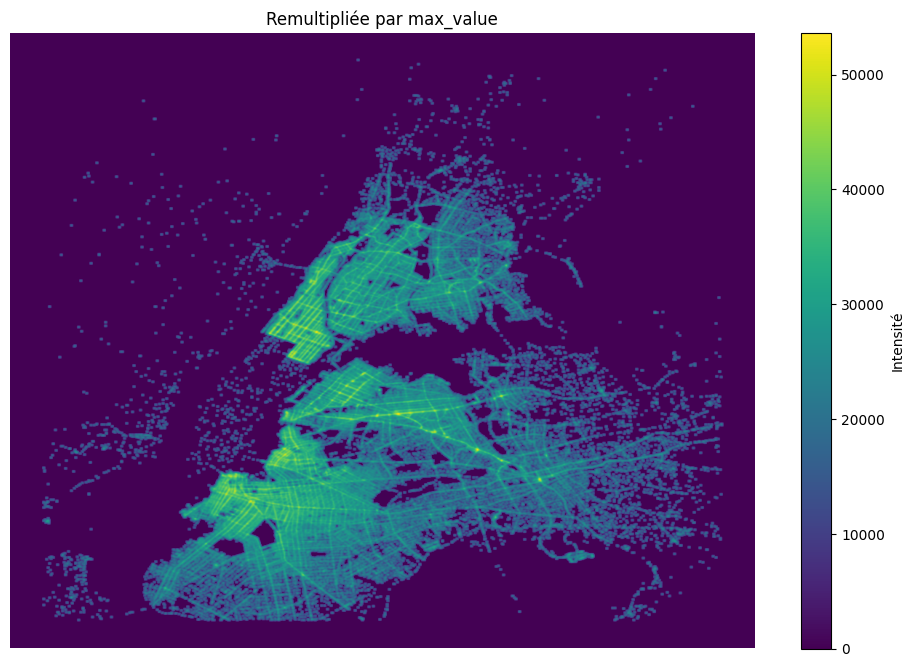

Image sauvegardée sous : green_pickup_final.png


In [12]:

print("Traitement pour Green Pickup :")
processed_green_pickup = process_and_visualize(
    green_pickup_blurred, "green_pickup_final.png", cmap=green_pickup_cmap
)



Traitement pour Yellow Dropoff :


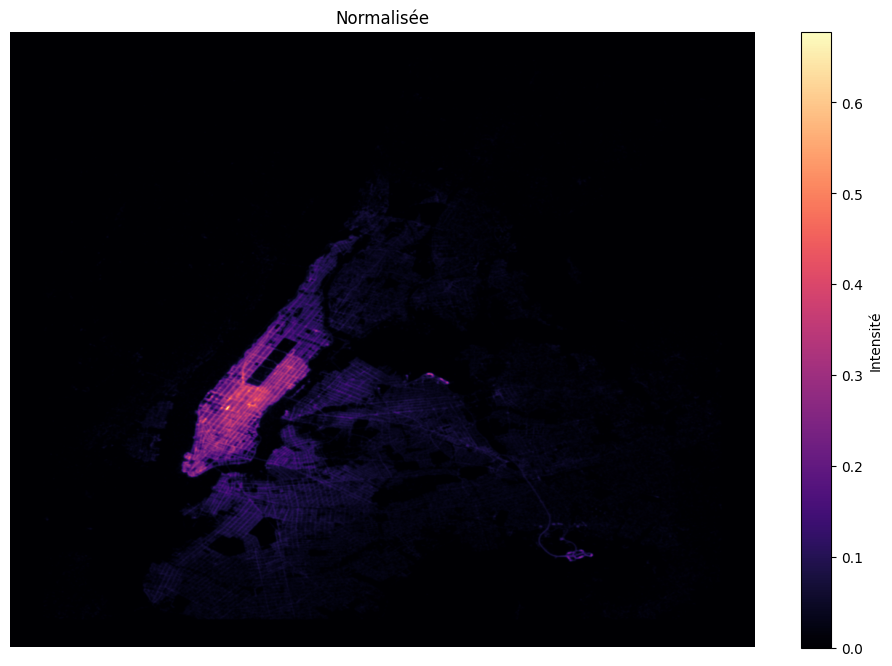

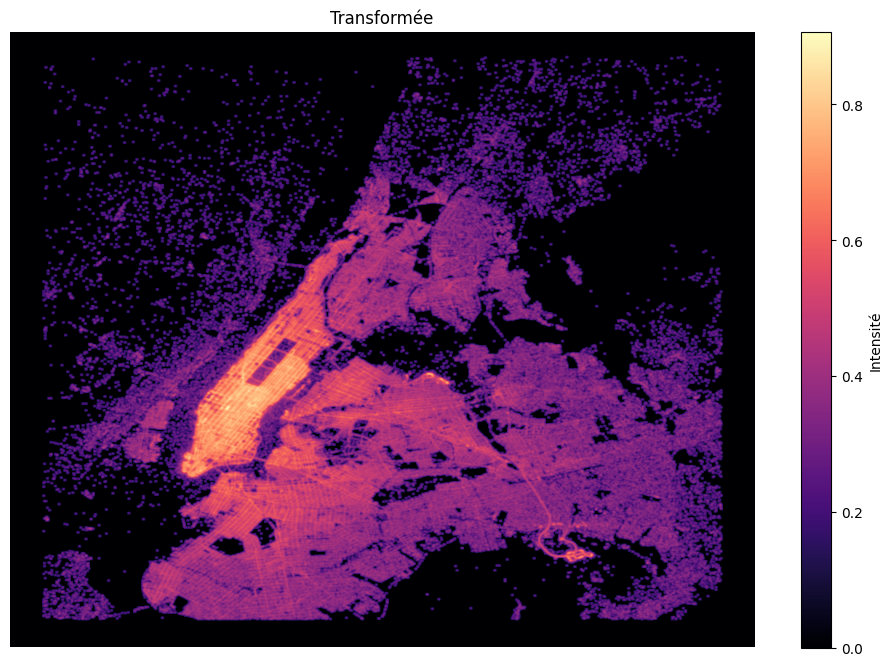

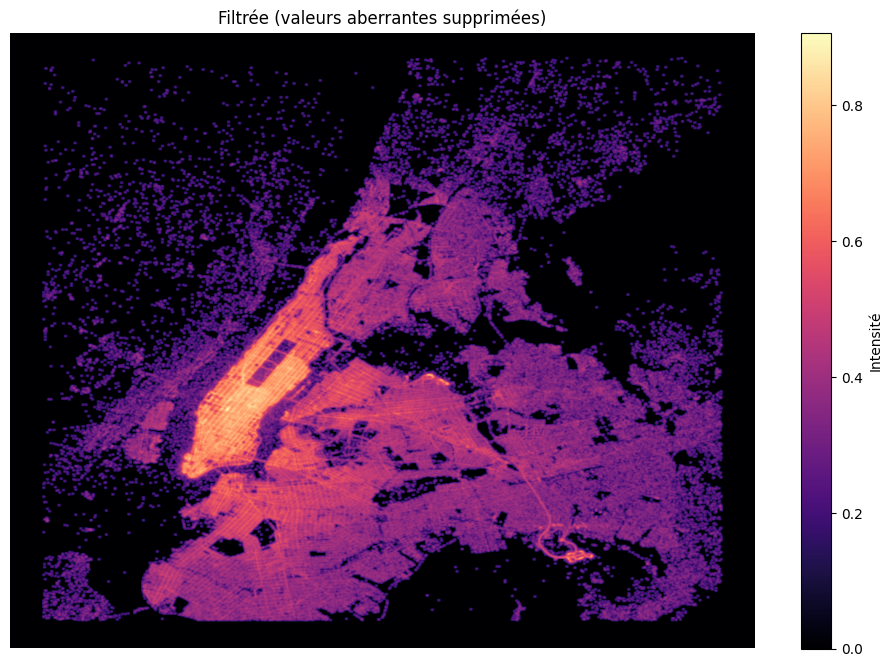

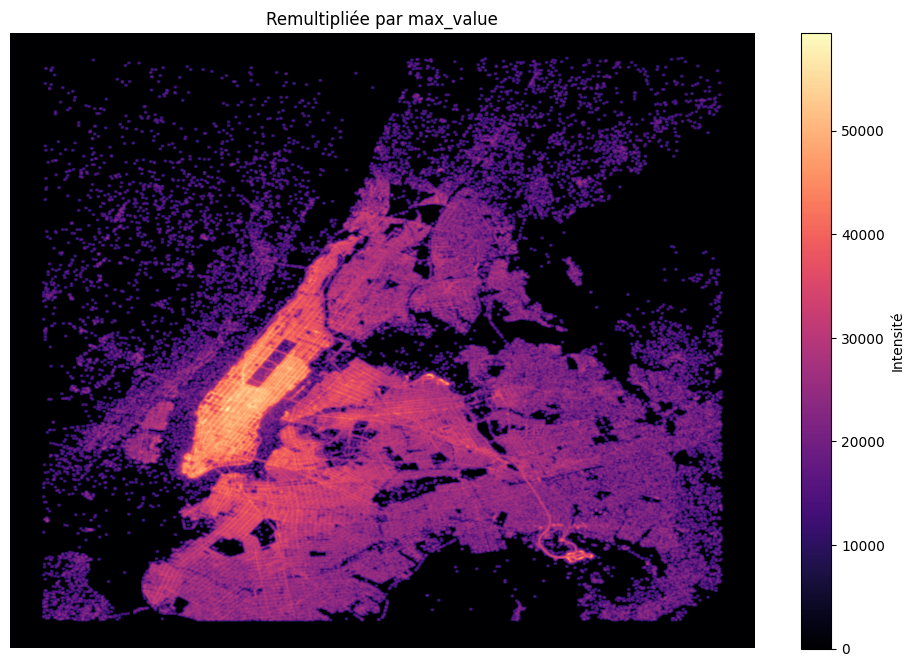

Image sauvegardée sous : yellow_dropoff_final.png


In [13]:
print("Traitement pour Yellow Dropoff :")
processed_yellow_dropoff = process_and_visualize(
    yellow_dropoff_blurred, "yellow_dropoff_final.png", cmap=yellow_dropoff_cmap
)

In [14]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import cv2
import plotly.graph_objects as go
from scipy.ndimage import convolve

# Fonction pour redimensionner une image à 1024x1024
def resize_to_1024x1024(image):
    return cv2.resize(image, (1024, 1024), interpolation=cv2.INTER_AREA)

# Charger et redimensionner les images finales
yellow_pickup_fin = np.array(cv2.imread("yellow_pickup_final.png", cv2.IMREAD_UNCHANGED))
green_pickup_fin = np.array(cv2.imread("green_pickup_final.png", cv2.IMREAD_UNCHANGED))
yellow_dropoff_fin = np.array(cv2.imread("yellow_dropoff_final.png", cv2.IMREAD_UNCHANGED))

# Fonction pour générer un noyau gaussien
def gaussian_kernel(size, sigma=1):
    """Créer un noyau gaussien."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Appliquer un flou gaussien à une image
def apply_gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=1.0)  # Vous pouvez ajuster sigma
    return convolve(image, kernel, mode='reflect')

# Listes des palettes disponibles
available_palettes = [
    "Viridis", "hot", "Magma", "Cividis", "Plasma", "Blues", "Reds", "Greens", "Purples", "YlOrRd"
]

# Application Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Répartition des Taxis à Manhattan", style={"textAlign": "center"}),

    # Contrôles interactifs
    html.Div([
        html.Label("Rayon du flou (taille du noyau Gaussien) :", style={"font-size": "16px"}),
        dcc.Slider(
            id="blur_radius",
            min=3,
            max=21,
            step=2,
            value=5,
            marks={i: f"{i}" for i in range(3, 22, 2)},
        ),
        html.Label("Palettes de couleurs :", style={"font-size": "16px", "margin-top": "10px"}),
        html.Div([
            html.Label("Yellow Pickup Palette:"),
            dcc.Dropdown(
                id="yellow_pickup_palette",
                options=[{"label": palette, "value": palette} for palette in available_palettes],
                value="hot",  # Palette par défaut
                style={"margin-bottom": "10px"}
            ),
            html.Label("Green Pickup Palette:"),
            dcc.Dropdown(
                id="green_pickup_palette",
                options=[{"label": palette, "value": palette} for palette in available_palettes],
                value="Viridis",  # Palette par défaut
                style={"margin-bottom": "10px"}
            ),
            html.Label("Yellow Dropoff Palette:"),
            dcc.Dropdown(
                id="yellow_dropoff_palette",
                options=[{"label": palette, "value": palette} for palette in available_palettes],
                value="Magma",  # Palette par défaut
                style={"margin-bottom": "10px"}
            ),
        ]),
        html.Label("Affichage des couches :", style={"font-size": "16px", "margin-top": "10px"}),
        dcc.Checklist(
            id="layer_selector",
            options=[
                {"label": "Yellow Pickup", "value": "yellow_pickup"},
                {"label": "Green Pickup", "value": "green_pickup"},
                {"label": "Yellow Dropoff", "value": "yellow_dropoff"},
            ],
            value=["yellow_pickup", "green_pickup", "yellow_dropoff"],
            inline=True,
        ),
    ], style={"margin-bottom": "20px"}),

    # Graphique interactif
    dcc.Graph(id="heatmap_graph", style={"height": "80vh"}),
])

@app.callback(
    Output("heatmap_graph", "figure"),
    [
        Input("blur_radius", "value"),
        Input("layer_selector", "value"),
        Input("yellow_pickup_palette", "value"),
        Input("green_pickup_palette", "value"),
        Input("yellow_dropoff_palette", "value")
    ]
)
def update_heatmap(blur_radius, selected_layers, yellow_palette, green_palette, dropoff_palette):
    fig = go.Figure()

    # Appliquer le flou à chaque couche sélectionnée
    if "yellow_pickup" in selected_layers:
        blurred_yellow = apply_gaussian_blur(yellow_pickup_fin, blur_radius)
        fig.add_trace(go.Heatmap(
            z=blurred_yellow,
            colorscale=yellow_palette,  # Palette dynamique
            opacity=0.6,
            name="Yellow Pickup"
        ))

    if "green_pickup" in selected_layers:
        blurred_green = apply_gaussian_blur(green_pickup_fin, blur_radius)
        fig.add_trace(go.Heatmap(
            z=blurred_green,
            colorscale=green_palette,  # Palette dynamique
            opacity=0.6,
            name="Green Pickup"
        ))

    if "yellow_dropoff" in selected_layers:
        blurred_dropoff = apply_gaussian_blur(yellow_dropoff_fin, blur_radius)
        fig.add_trace(go.Heatmap(
            z=blurred_dropoff,
            colorscale=dropoff_palette,  # Palette dynamique
            opacity=0.6,
            name="Yellow Dropoff"
        ))

    # Ajuster le layout pour la visualisation
    fig.update_layout(
        margin={"r": 0, "t": 0, "l": 0, "b": 0},
        xaxis=dict(title="Longitude"),
        yaxis=dict(title="Latitude"),
    )

    return fig

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [15]:
import numpy as np
import cv2
import folium
from folium.plugins import HeatMap

# Fonction pour convertir une matrice en données de heatmap
def generate_heatmap_data(matrix, top_left, bottom_right):
    heatmap_data = []
    height, width = matrix.shape
    lat_start, lon_start = top_left
    lat_end, lon_end = bottom_right

    lat_step = (lat_end - lat_start) / height
    lon_step = (lon_end - lon_start) / width

    for i in range(height):
        for j in range(width):
            intensity = matrix[i, j]
            if intensity > 0:
                lat = lat_start + i * lat_step
                lon = lon_start + j * lon_step
                heatmap_data.append([lat, lon, intensity])
    return heatmap_data

# Limites géographiques restreintes
top_left = (40.9176, -74.2591)  # Coin supérieur gauche
bottom_right = (40.4774, -73.7004)  # Coin inférieur droit

# Charger les images finales
yellow_pickup_fin = np.array(cv2.imread("yellow_pickup_final.png", cv2.IMREAD_UNCHANGED))
green_pickup_fin = np.array(cv2.imread("green_pickup_final.png", cv2.IMREAD_UNCHANGED))
yellow_dropoff_fin = np.array(cv2.imread("yellow_dropoff_final.png", cv2.IMREAD_UNCHANGED))

# Fonction de normalisation
def normalize_data(data):
    return data / np.max(data)

yellow_pickup_normalized = normalize_data(yellow_pickup_fin)
green_pickup_normalized = normalize_data(green_pickup_fin)
yellow_dropoff_normalized = normalize_data(yellow_dropoff_fin)

# Générer les données pour les heatmaps
yellow_pickup_data = generate_heatmap_data(yellow_pickup_normalized, top_left, bottom_right)
green_pickup_data = generate_heatmap_data(green_pickup_normalized, top_left, bottom_right)
yellow_dropoff_data = generate_heatmap_data(yellow_dropoff_normalized, top_left, bottom_right)

# Créer une carte centrée sur Manhattan
map_manhattan = folium.Map(location=[40.75, -73.99], zoom_start=12)

# Ajouter des heatmaps avec des paramètres ajustés
HeatMap(yellow_pickup_data, radius=5, blur=10, gradient={0: 'red', 0.5: 'orange', 1: 'yellow'}, name="Yellow Pickup").add_to(map_manhattan)
HeatMap(green_pickup_data, radius=5, blur=10, gradient={0: 'blue', 0.5: 'cyan', 1: 'green'}, name="Green Pickup").add_to(map_manhattan)
HeatMap(yellow_dropoff_data, radius=5, blur=10, gradient={0: 'purple', 0.5: 'pink', 1: 'magenta'}, name="Yellow Dropoff").add_to(map_manhattan)

# Ajouter un contrôle des couches interactif
folium.LayerControl().add_to(map_manhattan)

# Sauvegarder la carte dans un fichier HTML
map_manhattan.save("optimized_heatmap.html")